<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/finance_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Demo

Financial data often follows Benford's Law, which states that in real life numerical data, the leading digits are likely to be small. This property is often used in audits for fraud detection. Let's look at some examples.

## Setup

In [1]:
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from bs4 import BeautifulSoup

## Benford's Law Distribution

In [5]:
d = pd.Series(range(1, 10))
bfd = np.log10((d + 1) / d).to_frame().rename(columns={0: "benford"})
bfd['num'] = bfd.index + 1
bfd[['num', 'benford']]

,num,benford
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


## Stock Market Prices

Stock market prices, such as those used in indices like the S&P 100, Nasdaq, and Dow Jones, tend to follow Benford's Law. Below, we scrape live stock data from Business Insider's [website](https://markets.businessinsider.com/index/components/) and see if the latest stock prices in those 3 indices follow Benford's Law.

### Data

In [2]:
# Instantiate our list of rows
rows = []

# Business Insider has sites for each of these indices, so we'll query each one.
# In this for-loop, each stock index is represented by a tuple. 
#   [0] is the string literal in the link
#   [1] is the index name
#   [2] is the number of pages the site takes to display the entire table.
# We iterate over each one.
for idx in [('dow_jones', 'Dow Jones', 1), 
            ('s&p_500', 'S&P 500', 10), 
            ('nasdaq_100', 'Nasdaq 100', 2)]:
  # Here we iterate over each page
  for i in range(idx[2]):
    # Query the link:
    link = "https://markets.businessinsider.com/index/components/" + idx[0]
    if i > 0: link = link + "?p=" + str(i+1)
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")

    # The data are stored in an HTML element called "tbody"
    table = soup.find("tbody", {"class": "table__tbody"})

    # Each row is represented by the "tr" HTML element, so we iterate over each
    for tr in table.find_all("tr"):
      # Each value in the row is represented by the "td" element
      info = tr.find_all("td")
      # Here we construct the row in dictionary format
      # We also clean the data a little in the process
      rows.append({
          "Name": info[0].text.strip("\n"),
          "Index": idx[1],
          "Latest Price": info[1].text.strip("\t").split("\n")[1],
          "Previous Close": info[1].text.strip("\t").split("\n")[2],
          "Low": info[2].text.strip("\t").split("\n")[1],
          "High": info[2].text.strip("\t").split("\n")[2],
          "Change": info[3].text.split("\n")[1],
          "% Change": info[3].text.split("\n")[2],
          "Datetime": info[4].text.split("\n")[1],
          "3 Mo. Change": info[5].text.split("\n")[1],
          "3 Mo. % Change": info[5].text.split("\n")[2],
          "6 Mo. Change": info[6].text.split("\n")[1],
          "6 Mo. % Change": info[6].text.split("\n")[2],
          "1 Year Change": info[7].text.split("\n")[1],
          "1 Year % Change": info[7].text.split("\n")[2]
          })
    
    # We then delay our next loop so we don't get blocked...
    time.sleep(1)  

# Turn rows into tabular dataframe
stocks = pd.DataFrame(rows)
stocks

,Name,Index,Latest Price,Previous Close,Low,High,Change,% Change,Datetime,3 Mo. Change,3 Mo. % Change,6 Mo. Change,6 Mo. % Change,1 Year Change,1 Year % Change
0,3M,Dow Jones,100.24,100.27,99.28,101.27,-0.03,-0.03%,07:53 PM05/12/2023 07:53:57 PM UTC-0400,-13.12,-11.52%,-32.26,-24.25%,-45.70,-31.20%
1,American Express,Dow Jones,147.88,147.92,147.10,149.27,-0.04,-0.03%,07:37 PM05/12/2023 07:37:44 PM UTC-0400,-31.26,-17.44%,-6.88,-4.44%,-11.36,-7.13%
2,Amgen,Dow Jones,233.05,232.95,231.23,233.55,0.10,0.04%,07:50 PM05/12/2023 07:50:15 PM UTC-0400,-10.21,-4.21%,-52.73,-18.50%,-8.35,-3.47%
3,Apple,Dow Jones,172.37,172.57,171.00,174.06,-0.20,-0.12%,07:59 PM05/12/2023 07:59:53 PM UTC-0400,22.74,15.06%,24.05,16.07%,27.25,18.60%
4,Boeing,Dow Jones,200.20,200.68,198.82,203.06,-0.48,-0.24%,07:58 PM05/12/2023 07:58:40 PM UTC-0400,-11.02,-5.18%,24.36,13.72%,72.38,55.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Walgreens Boots Alliance,Nasdaq 100,31.07,31.07,30.86,31.39,0.00,0.00%,07:58 PM05/12/2023 07:58:32 PM UTC-0400,-5.38,-14.72%,-10.09,-24.45%,-12.18,-28.10%
600,Warner Bros. Discovery,Nasdaq 100,12.45,12.51,12.25,12.63,-0.06,-0.47%,07:59 PM05/12/2023 07:59:07 PM UTC-0400,-1.84,-12.94%,0.54,4.56%,-4.24,-25.51%
601,Workda a,Nasdaq 100,181.74,182.76,174.70,183.10,-1.02,-0.56%,06:49 PM05/12/2023 06:49:13 PM UTC-0400,-8.53,-4.57%,21.37,13.62%,5.18,2.99%
602,Xcel Energy,Nasdaq 100,68.89,68.89,68.54,69.39,0.00,0.00%,05:00 PM05/13/2023 05:00:01 PM UTC-0400,0.14,0.20%,1.13,1.67%,-5.35,-7.23%


### Calculating Proportions

In [6]:
obs_stock = stocks['Latest Price'].astype(str).apply(lambda x: x[0])
obs_stock = obs_stock[(obs_stock != "n") & (obs_stock != "0")].astype(int)
obs_stock = obs_stock.value_counts(normalize=True).sort_index().to_frame().reset_index(names="num").rename(columns={"Latest Price": "observed"})
obs_stock

,num,observed
0,1,0.311258
1,2,0.175497
2,3,0.125828
3,4,0.086093
4,5,0.059603
5,6,0.077815
6,7,0.066225
7,8,0.041391
8,9,0.056291


### Visualization

<Axes: xlabel='num'>

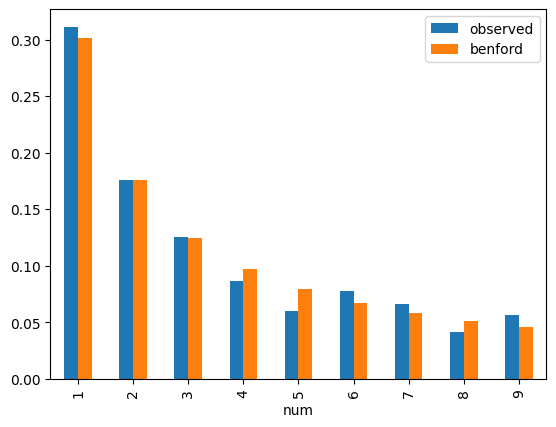

In [7]:
both_stock = pd.merge(left=obs_stock, right=bfd, on="num")
both_stock.plot.bar(x="num")

### Chi-Square Goodness of Fit Test

In [11]:
observed = stocks['Latest Price'].astype(str).apply(lambda x: x[0])
observed = observed[observed != "n"].astype(int)
observed = observed.value_counts().sort_index()
observed

benford = bfd['benford'] * sum(observed)
benford

test_stat, p = stats.chisquare(observed, benford)
print("Test Statistic:", test_stat)
print("p-value:", p)

Test Statistic: 8.229752254645925
p-value: 0.4113552718460192


## Superstorm Sandy Loans

After Superstorm Sandy battered the east coast, many affected businesses were able to receive loans from the US Small Business Adminstration to help recover. We can see that these loans follow Benford's Law as well.

### Data

In [14]:
loans = pd.read_csv("https://mshsu.github.io/probasets/data/SandyLoans.csv")
loans

,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,SBA Disaster Number,Damaged Property City Name,Damaged Property Zip Code,Damaged Property County/Parish Name,Damaged Property State Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,Total Approved Loan Amount,Approved Amount Real Estate,Approved Amount Content,Approved Amount EIDL
0,13365,13366.0,4085.0,NY-00130,ALBERTSON,11507.0,NASSAU,NY,"51,955.00","42,355.00","9,600.00","50,400.00",0.00,0.00,"50,400.00"
1,13365,13366.0,4085.0,NY-00130,AMITY HARBOR,11701.0,SUFFOLK,NY,"471,587.00","407,182.00","64,405.00","175,300.00","105,400.00","55,700.00","14,200.00"
2,13365,13366.0,4085.0,NY-00130,AMITYV ILLE,11701.0,SUFFOLK,NY,0.00,0.00,0.00,"18,500.00",0.00,0.00,"18,500.00"
3,13365,13366.0,4085.0,NY-00130,AMITYVILLE,11701.0,NASSAU,NY,"27,812.00","16,712.00","11,100.00",0.00,0.00,0.00,0.00
4,13365,13366.0,4085.0,NY-00130,AMITYVILLE,11701.0,SUFFOLK,NY,"4,205,242.00","3,300,857.00","904,385.00","1,552,600.00","899,400.00","279,900.00","373,300.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,13435,13436.0,NaN,MD-00026,PRINCESS ANNE,21853.0,SOMERSET,MD,"60,386.00","60,386.00",0.00,0.00,0.00,0.00,0.00
1358,13435,13436.0,NaN,MD-00026,SALISBURY,21801.0,WICOMICO,MD,"200,474.00","70,930.00","129,544.00","135,500.00","31,000.00","104,500.00",0.00
1359,13435,13436.0,NaN,MD-00026,SELBYVILLE,19975.0,SUSSEX,DE,"21,600.00",0.00,"21,600.00","14,000.00",0.00,"14,000.00",0.00
1360,Business Data Only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating Proportions

In [16]:
obs_loans = loans['Total Approved Loan Amount'].astype(str).apply(lambda x: x[0])
obs_loans = obs_loans[(obs_loans != "n") & (obs_loans != "0")].astype(int)
obs_loans = obs_loans.value_counts(normalize=True).sort_index().to_frame().reset_index(names="num").rename(columns={"Total Approved Loan Amount": "observed"})
obs_loans

,num,observed
0,1,0.311787
1,2,0.186312
2,3,0.108999
3,4,0.110266
4,5,0.077313
5,6,0.069708
6,7,0.060837
7,8,0.036755
8,9,0.038023


<Axes: xlabel='num'>

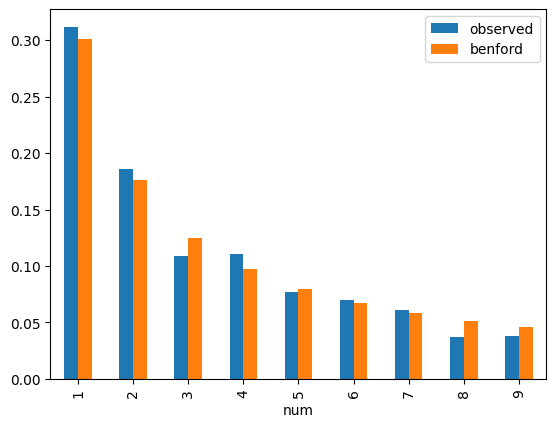

In [17]:
both_loans = pd.merge(left=obs_loans, right=bfd, on="num")
both_loans.plot.bar(x="num")

In [22]:
observed = loans['Total Approved Loan Amount'].astype(str).apply(lambda x: x[0])
observed = observed[(observed != "n") & (observed != "0")].astype(int)
observed = observed.value_counts().sort_index()
observed

benford = bfd['benford'] * sum(observed)
benford

test_stat, p = stats.chisquare(observed, benford)
print("Test Statistic:", test_stat)
print("p-value:", p)

Test Statistic: 8.291709980221782
p-value: 0.4055062536953217
